# Expected world

In [1]:
library(reshape2)
library(gmp)
library(Rmpfr)
library(dplyr)
library(ggplot2)
library(grid)
library(gridExtra)
library(cowplot)
source("model.R")

get_g <- function(p, n, k) {
  return(sum(p^k * (1 - p)^(n - k)))
}



Attaching package: 'gmp'


The following objects are masked from 'package:base':

    %*%, apply, crossprod, matrix, tcrossprod


C code of R package 'Rmpfr': GMP using 64 bits per limb



Attaching package: 'Rmpfr'


The following object is masked from 'package:gmp':

    outer


The following objects are masked from 'package:stats':

    dbinom, dgamma, dnbinom, dnorm, dpois, dt, pnorm


The following objects are masked from 'package:base':

    cbind, pmax, pmin, rbind



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [2]:
prec <- 10000
S <- 1000

df_m <- data.frame(model = integer(), n = integer(), logbias_GT = numeric(), logbias_BT = numeric())
for (model_idx in 1:6) {
  model <- get_model(model_idx, prec, S = S)
  for (n in seq(500, 10000, 500)) {
    cat("\r", model_idx, n, end = "")
    flush.console()
    GT_bias <- get_g(model$p, n + 1, 2)
    BT_bias <- get_g(model$p, n + 1, n + 1)
    df_m <- rbind(df_m, data.frame(
      model = model_idx, n = n,
      GT = asNumeric(log10(GT_bias)),
      BT = asNumeric(log10(BT_bias))
    ))
  }
}

df_m


 6 10000 

model,n,GT,BT
<int>,<dbl>,<dbl>,<dbl>
1,500,-3.216821,-1500.000
1,1000,-3.434077,-3000.000
1,1500,-3.651333,-4500.000
1,2000,-3.868589,-6000.000
1,2500,-4.085845,-7500.000
1,3000,-4.303101,-9000.000
1,3500,-4.520357,-10500.000
1,4000,-4.737613,-12000.000
1,4500,-4.954868,-13500.000


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


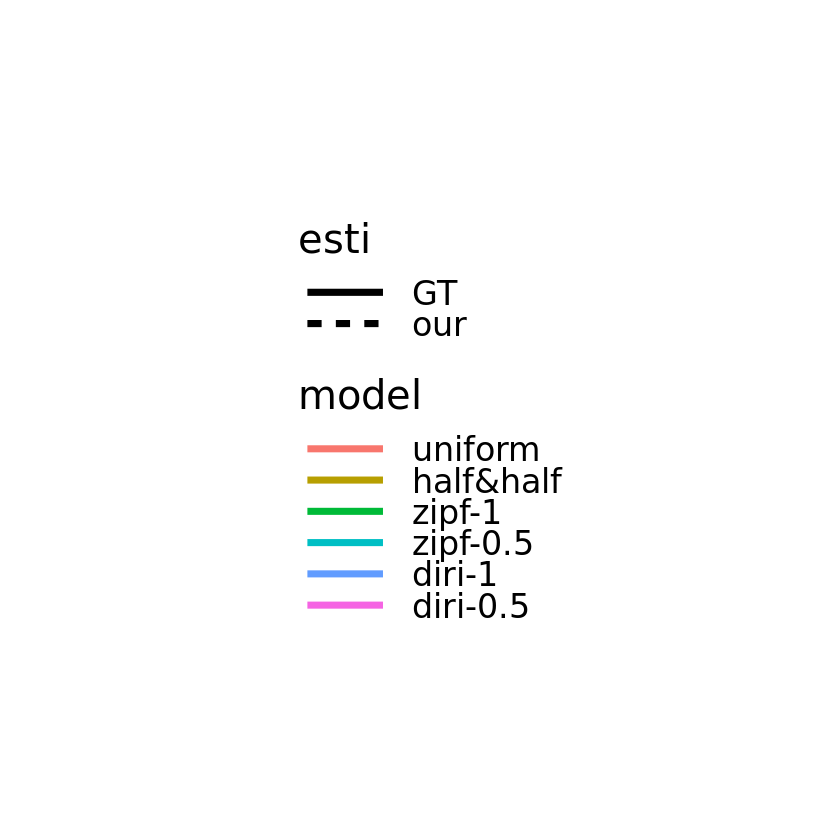

In [3]:
my_line <- (df_m %>%
  mutate(our = BT) %>%
  select(-BT) %>%
  mutate(model = factor(model, levels = 1:6, labels = c("uniform", "half&half", "zipf-1", "zipf-0.5", "diri-1", "diri-0.5"))) %>%
  melt(id.vars = c("model", "n"), variable.name = "esti", value.name = "logabsbias") %>%
  mutate(esti = factor(esti, levels = c("GT", "our"))) %>%
  mutate(model_esti = paste(model, esti, sep = "-")) %>%
  filter(n %in% seq(500, 10000, 500)) %>%
  ggplot(aes(x = n, y = logabsbias, color = model, shape = esti, linetype = esti, group = model_esti)) +
  geom_line(size = 2) +
  theme_bw() +
  ylab(expression(log[10] * " " * "|" * bias * "|")) +
  scale_y_continuous(labels = function(x) format(x, scientific = TRUE)) +
  theme(
    legend.key.width = unit(2, "cm"),
    text = element_text(size = 24),
    legend.text = element_text(size = 20),
    plot.margin = margin(r = 20, unit = "pt")
  ))
# only legend
legend <- cowplot::get_legend(my_line)
grid.newpage()
grid.draw(legend)


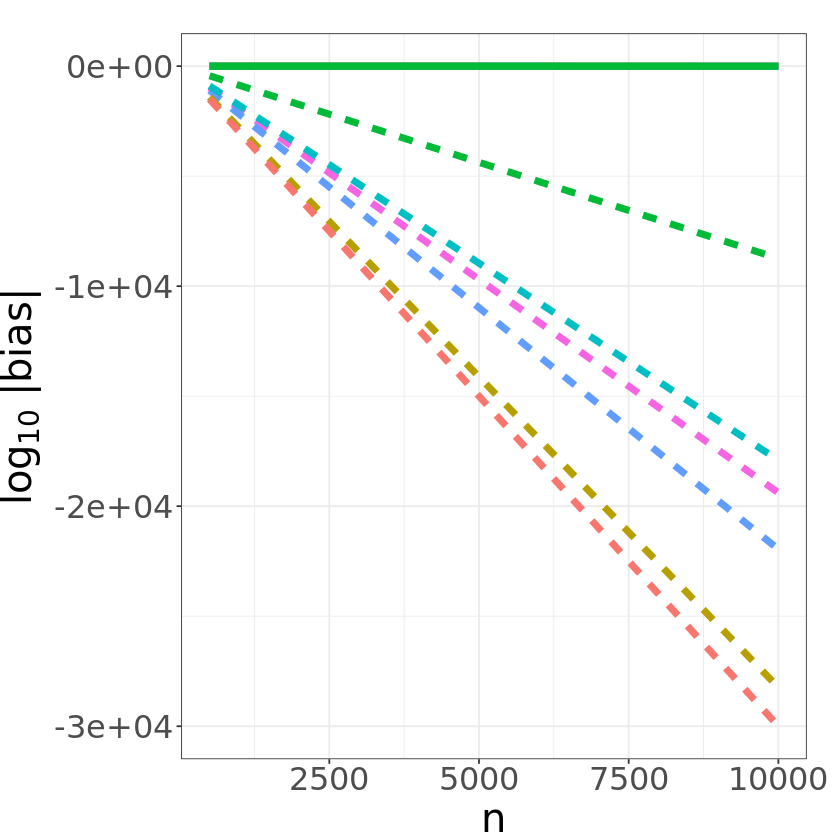

In [4]:
df_m %>%
  mutate(our = BT) %>%
  select(-BT) %>%
  mutate(model = factor(model, levels = 1:6, labels = c("uniform", "half&half", "zipf-1", "zipf-0.5", "diri-1", "diri-0.5"))) %>%
  melt(id.vars = c("model", "n"), variable.name = "esti", value.name = "logabsbias") %>%
  mutate(esti = factor(esti, levels = c("GT", "our"))) %>%
  mutate(model_esti = paste(model, esti, sep = "-")) %>%
  filter(n %in% seq(500, 10000, 500)) %>%
  ggplot(aes(x = n, y = logabsbias, color = model, shape = esti, linetype = esti, group = model_esti)) +
  geom_line(size = 2) +
  theme_bw() +
  ylab(expression(log[10] * " " * "|" * bias * "|")) +
  scale_y_continuous(labels = function(x) format(x, scientific = TRUE)) +
  theme(
    legend.position = "none",
    legend.box = "horizontal",
    text = element_text(size = 24),
    legend.text = element_text(size = 20),
    plot.margin = margin(r = 20, t = 20, unit = "pt")
  )
ggsave("figures/2a.pdf", width = 6, height = 4)


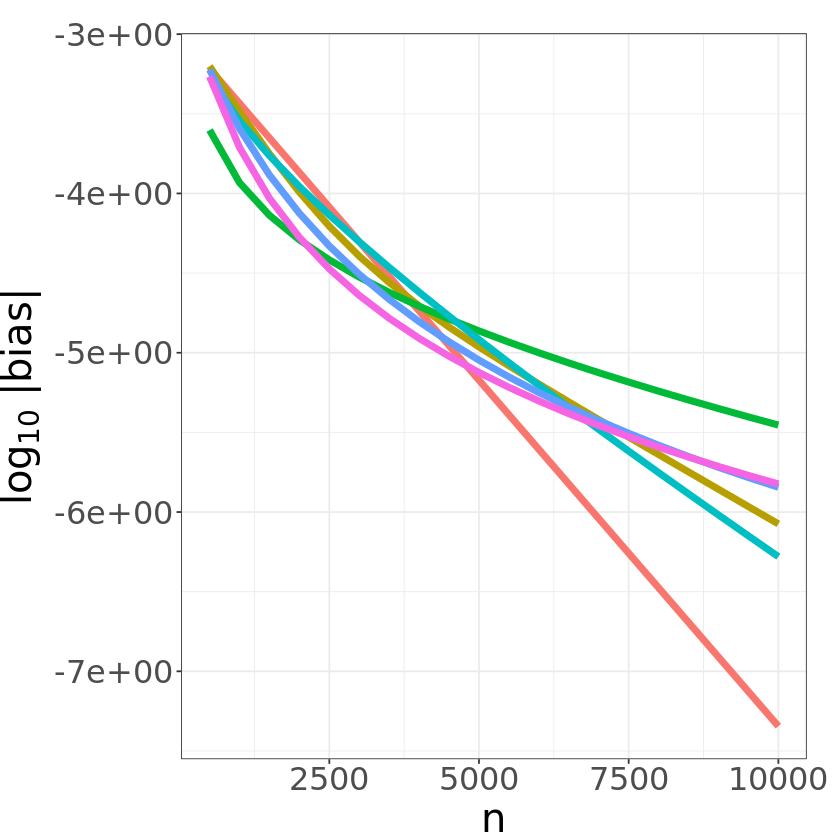

In [5]:
df_m %>%
  select(-BT) %>%
  mutate(model = factor(model, levels = 1:6, labels = c("uniform", "half&half", "zipf-1", "zipf-0.5", "diri-1", "diri-0.5"))) %>%
  melt(id.vars = c("model", "n"), variable.name = "esti", value.name = "logabsbias") %>%
  mutate(esti = factor(esti, levels = c("GT"))) %>%
  filter(n %in% seq(500, 10000, 500)) %>%
  ggplot(aes(x = n, y = logabsbias, color = model)) +
  geom_line(size = 2) +
  theme_bw() +
  ylab(expression(log[10] * " " * "|" * bias * "|")) +
  scale_y_continuous(labels = function(x) format(x, scientific = TRUE)) +
  theme(
    legend.position = "none",
    legend.box = "horizontal",
    text = element_text(size = 24),
    legend.text = element_text(size = 20),
    plot.margin = margin(r = 20, t = 20, unit = "pt")
  )
# save
ggsave("figures/2b.pdf", width = 6, height = 4)


In [6]:
prec <- 10000
S <- 1000
n <- 2000

get_f <- function(p, n, k) {
  return(get_g(p, n, k) * chooseZ(n, k))
}

df_t <- data.frame(model = integer(), k = integer(), logbias_GT = numeric(), logbias_BT = numeric())
for (model_idx in 1:6) {
  model <- get_model(model_idx, prec, S = S)
  p <- model$p
  for (k in seq(100, 2000, 100)) {
    cat("\r", model_idx, k, end = "")
    flush.console()
    if (k != 2000) {
      GT_bias <- -get_f(p, n, k + 1) * (k * (k + 1) / n / (n - k)) + get_g(p, n + 1, k + 2) * chooseZ(n, k)
    } else {
      GT_bias <- get_g(p, n + 1, k + 2) * chooseZ(n, k)
    }
    BT_bias <- get_g(p, n + 1, n + 1) * chooseZ(n, k)
    df_t <- rbind(df_t, data.frame(
      model = model_idx, k = k,
      GT = asNumeric(log10(abs(GT_bias))),
      BT = asNumeric(log10(BT_bias))
    ))
  }
}

df_t


 6 2000 

model,k,GT,BT
<int>,<dbl>,<dbl>,<dbl>
1,100,-131.0951,-5828.960
1,200,-320.9495,-5719.163
1,300,-536.0071,-5634.442
1,400,-768.4037,-5567.008
1,500,-1014.5032,-5513.248
1,600,-1272.2530,-5471.121
1,700,-1540.3848,-5439.363
1,800,-1818.0893,-5417.169
1,900,-2104.8620,-5404.037


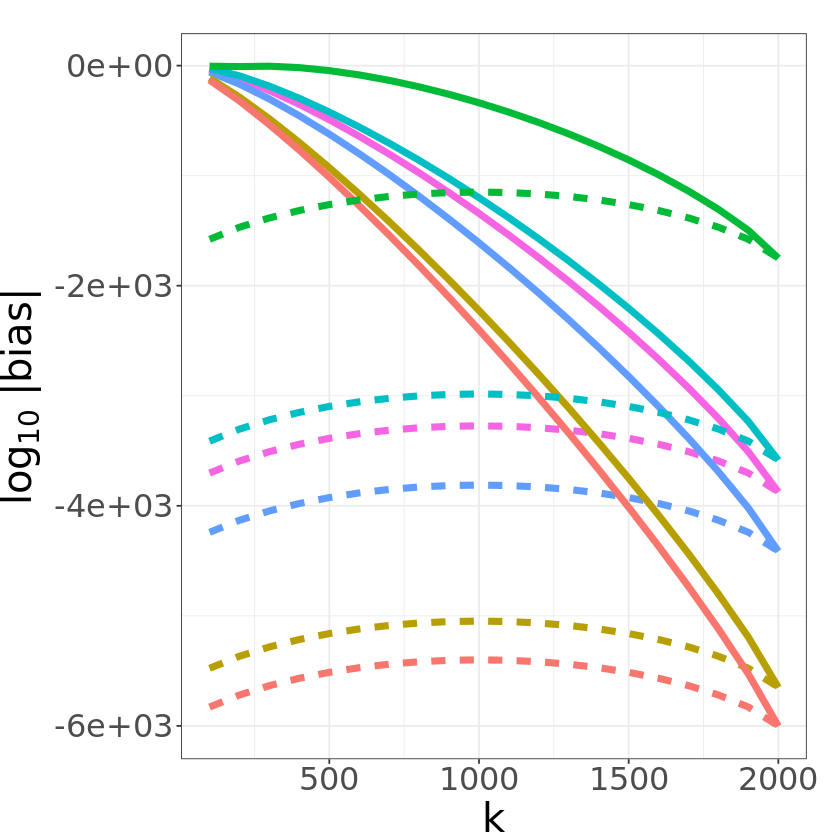

In [7]:
df_t %>%
  mutate(our = BT) %>%
  select(-BT) %>%
  mutate(model = factor(model, levels = 1:6, labels = c("uniform", "half&half", "zipf-1", "zipf-0.5", "diri-1", "diri-0.5"))) %>%
  melt(id.vars = c("model", "k"), variable.name = "esti", value.name = "logabsbias") %>%
  mutate(esti = factor(esti, levels = c("GT", "our"))) %>%
  mutate(model_esti = paste(model, esti, sep = "-")) %>%
  ggplot(aes(x = k, y = logabsbias, color = model, shape = esti, linetype = esti, group = model_esti)) +
  geom_line(size = 2) +
  theme_bw() +
  ylab(expression(log[10] * " " * "|" * bias * "|")) +
  scale_y_continuous(labels = function(x) format(x, scientific = TRUE)) +
  theme(
    legend.position = "none",
    legend.box = "horizontal",
    text = element_text(size = 24),
    legend.text = element_text(size = 20),
    plot.margin = margin(r = 20, t = 20, unit = "pt")
  )
# save
ggsave("figures/2c.pdf", width = 6, height = 4)
